In [1]:
!pip install -U -q PyDrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
file_id = '1Grcn7WTEfnHOiYsTldEdnPaeMoATUQYn' # URL id. 
# https://drive.google.com/file/d/1Grcn7WTEfnHOiYsTldEdnPaeMoATUQYn/view?usp=sharing
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('lastfm_processed_final.parquet')

In [4]:
!ls #to verify content

lastfm_processed_final.parquet	sample_data


In [123]:
import pandas as pd

df = pd.read_parquet("lastfm_processed_final.parquet")

In [6]:
df.columns

Index(['user_id', 'md5_tn', 'md5_an', 'artist_id', 'track_id', 'artist_name',
       'track_name', 'date_played', 'registered', 'timestamp', 'dur_secs',
       'gender', 'age', 'country'],
      dtype='object')

In [7]:
if "user_000001" in df.user_id.values:
    print('Element exists in Dataframe')

Element exists in Dataframe


In [8]:
df[df['user_id'] == "user_000001"].loc[0]

user_id                                 user_000001
md5_tn             5c69d2cda1fe628900f5267b5308263e
md5_an             7952919f01999ef15c40c7c2b69f6fa4
artist_id      69158f97-4c07-4c4e-baf8-4e4ab1ed666e
track_id       ef756a43-0905-4e59-8f05-a6b2bd977aa8
artist_name                        BOARDS OF CANADA
track_name                            DAYVAN COWBOY
date_played                              2006-08-13
registered                      2006-08-13 00:00:00
timestamp                       2006-08-13 17:58:51
dur_secs                                 301.146022
gender                                            M
age                                             NaN
country                                       JAPAN
Name: 0, dtype: object

In [9]:
df[df['user_id'] == "user_000001"].gender.loc[0]

'M'

In [10]:
country = df[df['user_id'] == "user_000001"].country.loc[0]
print(country)

JAPAN


In [11]:
age = df[df['user_id'] == "user_000001"].age.loc[0]
print(age)

nan


In [12]:
mas_escuchados_artistas = df[df['user_id'] == "user_000001"].groupby("artist_name").count()
mas_escuchados_artistas = mas_escuchados_artistas.sort_values('user_id',ascending=False)
mas_escuchados_artistas = mas_escuchados_artistas.iloc[:5].index
mas_escuchados_artistas.values

array(['UNDERWORLD', 'CORNELIUS', 'Å\x9d\x82Æ\x9c¬É¾\x8dÄ¸\x80', 'PLAID',
       'BJÃ¶RK'], dtype=object)

In [13]:
mas_escuchados_artistas_count = df[df['user_id'] == "user_000001"].groupby("artist_name").count()
mas_escuchados_artistas_count = mas_escuchados_artistas_count.sort_values('user_id',ascending=False)
mas_escuchados_artistas_count = mas_escuchados_artistas_count.iloc[:5]
mas_escuchados_artistas_count

,user_id,md5_tn,md5_an,artist_id,track_id,track_name,date_played,registered,timestamp,dur_secs,gender,age,country
artist_name,,,,,,,,,,,,,
UNDERWORLD,689,689,689,689,689,689,689,689,689,689,689,0,689
CORNELIUS,454,454,454,454,454,454,454,454,454,454,454,0,454
ÅÆ¬É¾Ä¸,434,434,434,434,434,434,434,434,434,434,434,0,434
PLAID,419,419,419,419,419,419,419,419,419,419,419,0,419
BJÃ¶RK,410,410,410,410,410,410,410,410,410,410,410,0,410


In [15]:
mas_escuchados_canciones = df[df['user_id'] == "user_000001"].groupby("track_name").count()
mas_escuchados_canciones = mas_escuchados_canciones.sort_values('user_id',ascending=False)
mas_escuchados_canciones = mas_escuchados_canciones.iloc[:5].index
mas_escuchados_canciones.values

array(['MUSIC', 'GUM', 'CHILD SONG', 'HIBARI', 'TO BUILD A HOME'],
      dtype=object)

In [16]:
mas_escuchados_canciones_tiempo = df[df['user_id'] == "user_000001"].groupby("date_played").count()
mas_escuchados_canciones_tiempo = mas_escuchados_canciones_tiempo.sort_values('dur_secs',ascending=False)
mas_escuchados_canciones_tiempo = mas_escuchados_canciones_tiempo.iloc[:5].index
mas_escuchados_canciones_tiempo.values


array(['2009-02-05', '2006-10-24', '2008-06-10', '2009-01-05',
       '2009-03-04'], dtype=object)

In [17]:
# Descripción variable artista
artist_name = pd.DataFrame(df['artist_name'].value_counts())
artist_name["index"] = artist_name.index
artist_name.rename(columns={'index':'artist_name', 'artist_name':'valores'}, inplace=True)
artist_name.columns


Index(['valores', 'artist_name'], dtype='object')

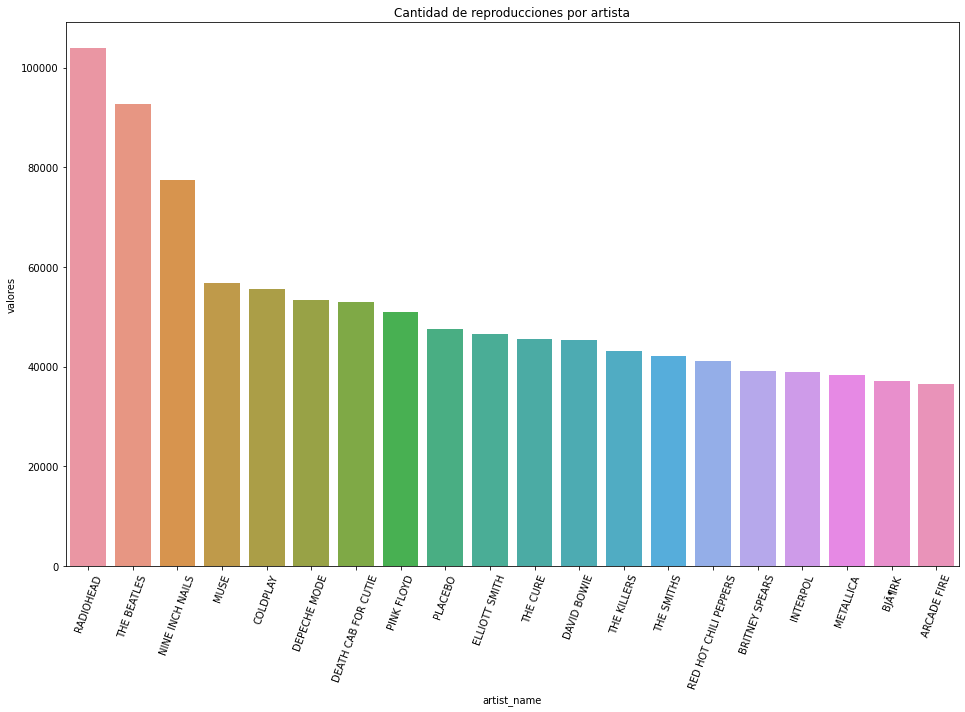

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(16,10))
sns.barplot(x="artist_name", y="valores", data=artist_name.head(20)).set_title('Cantidad de reproducciones por artista')
plt.xticks(rotation=70)
plt.show()
plt.savefig('reproducciones.png')

In [19]:
# Descripción variable canción (sin limpieza)
track_name = pd.DataFrame(df['track_name'].value_counts())
track_name["index"] = track_name.index
track_name.rename(columns={'index':'track_name', 'track_name':'valores'}, inplace=True)
track_name.columns

Index(['valores', 'track_name'], dtype='object')

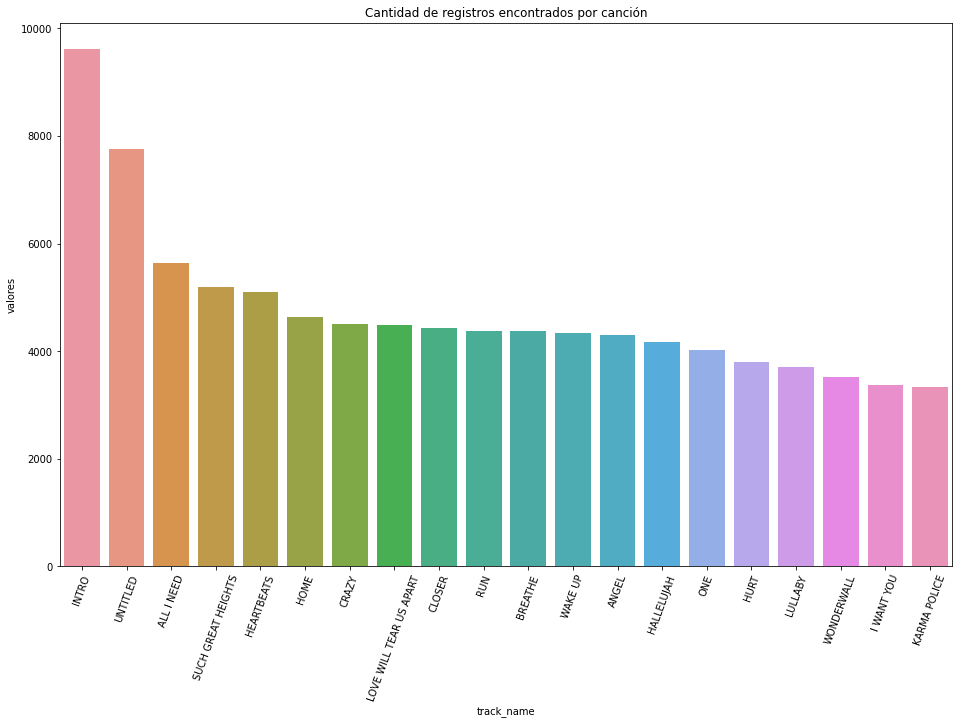

In [20]:
plt.figure(figsize=(16,10))
sns.barplot(x="track_name", y="valores", data=track_name.head(20)).set_title('Cantidad de registros encontrados por canción')
plt.xticks(rotation=70)
plt.show()

In [21]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 4.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630192 sha256=5e4de6454af608ee27ee0eeac1ed1a9e8e689bf0c0cb987a05a33729cd34edb7
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [44]:
#Recomendaciones
import pickle
from surprise import dump, Dataset, Reader

downloaded.GetContentFile('matriz_entrenamiento.parquet')
downloaded.GetContentFile('model.pkl')
downloaded.GetContentFile('modelo')

In [94]:
from collections import defaultdict
# formula tomada de la documentación de surprise
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [124]:
x_df = pd.read_parquet("matriz_entrenamiento.parquet")
x_df

,user_id,artist_id,rating
0,user_000499,bf710b71-48e5-4e15-9bd6-96debb2e4e98,247.196702
1,user_000768,83e59f23-3b0b-4304-834d-5bcafd5df6d2,193.352673
2,user_000458,b6c18308-82c7-4ec1-a42d-e8488bce6618,171.230550
3,user_000008,164f0d73-1234-4e2c-8743-d77bf2191051,154.132607
4,user_000033,ab309b83-904f-4e2c-8d11-a0223bba51f9,134.989429
...,...,...,...
19901,user_000445,5a6e19e0-3ff0-4b3d-869e-3c539d6d8707,0.010014
19902,user_000322,10bf95b6-30e3-44f1-817f-45762cdc0de0,0.010014
19903,user_000162,83b9cbe7-9857-49e2-ab8e-b57b01038103,0.010007
19904,user_000224,11ae9fbb-f3d7-4a47-936f-4c0a04d3b3b5,0.010007


In [125]:
reader = Reader( rating_scale = ( 0, 250 ) )
#Se crea el dataset a partir del dataframe
df_temp = x_df[['user_id', 'artist_id', 'rating']]
df_temp = df_temp[df_temp['user_id'] == "user_000001"]
surprise_dataset = Dataset.load_from_df(df_temp, reader)

from surprise.model_selection import train_test_split
trainset, testset = train_test_split(surprise_dataset, test_size=.99)
testset

[('user_000001', '1c70a3fc-fa3c-4be1-8b55-c3192db8a884', 0.028983187914222223),
 ('user_000001', '66a7f1f8-0ad6-4e3a-9346-a643e2739a8c', 0.012995971371942607),
 ('user_000001', 'ec4e96b9-a5fc-4eea-9c69-2cc2a395f46e', 0.10357150367198222),
 ('user_000001', '7e54d133-2525-4bc0-ae94-65584145a386', 1.5802399777826808),
 ('user_000001', '1292906d-cd67-4158-a3d6-19c7c9df3e8f', 0.5490812897690713),
 ('user_000001', 'a3031680-c359-458f-a641-70ccbaec6a74', 0.02241296914087378),
 ('user_000001', 'bc3d74c5-9328-4a1b-8014-3ecdb3dababe', 0.031218456900206974),
 ('user_000001', 'df765d93-621c-437f-99fe-fda9e135f89a', 3.182559178781516),
 ('user_000001', 'ba2f4f3b-0293-4bc8-bb94-2f73b5207343', 3.008771763035638),
 ('user_000001', 'a7f7df4a-77d8-4f12-8acd-5c60c93f4de8', 1.97143718203362),
 ('user_000001', 'f6ed9964-eb6b-4bed-81f9-277a2c50a833', 0.02165410840867838),
 ('user_000001', 'a7835277-ab17-4506-a033-60f018757b84', 0.018690459205892233),
 ('user_000001', '7c158ea8-c0aa-410e-bdc1-20bba9759577', 

In [66]:
model = dump.load("./modelo")[1]
print(model)


In [71]:
model.predict("user_000001", "df765d93-621c-437f-99fe-fda9e135f89a")

Prediction(uid='user_000001', iid='df765d93-621c-437f-99fe-fda9e135f89a', r_ui=None, est=0.7912860820201302, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [126]:
predictions_model = model.test(testset)
top_n_model = get_top_n(predictions_model, n=5)
top_n_model

defaultdict(list,
            {'user_000001': [('1c70a3fc-fa3c-4be1-8b55-c3192db8a884',
               0.7912860820201302),
              ('66a7f1f8-0ad6-4e3a-9346-a643e2739a8c', 0.7912860820201302),
              ('ec4e96b9-a5fc-4eea-9c69-2cc2a395f46e', 0.7912860820201302),
              ('7e54d133-2525-4bc0-ae94-65584145a386', 0.7912860820201302),
              ('1292906d-cd67-4158-a3d6-19c7c9df3e8f', 0.7912860820201302)]})

In [127]:
list_key = [i for i in top_n_model if top_n_model[i]!=top_n_model.default_factory()]
list_key

['user_000001']

In [128]:
list_value = [v for k,v in top_n_model.items() if v!=top_n_model.default_factory()]
list_value

[[('1c70a3fc-fa3c-4be1-8b55-c3192db8a884', 0.7912860820201302),
  ('66a7f1f8-0ad6-4e3a-9346-a643e2739a8c', 0.7912860820201302),
  ('ec4e96b9-a5fc-4eea-9c69-2cc2a395f46e', 0.7912860820201302),
  ('7e54d133-2525-4bc0-ae94-65584145a386', 0.7912860820201302),
  ('1292906d-cd67-4158-a3d6-19c7c9df3e8f', 0.7912860820201302)]]

In [145]:
dict_temp = dict()
for i in range(0, 5):
  print(list_value[0][i][0], list_value[0][i][1])
  print(df[df['artist_id'] == list_value[0][i][0]]["artist_name"].iloc[0])
  dict_temp[df[df['artist_id'] == list_value[0][i][0]]["artist_name"].iloc[0]] = round(list_value[0][i][1], 2) * 100
  print("###################")


1c70a3fc-fa3c-4be1-8b55-c3192db8a884 0.7912860820201302
RÃ¶YKSOPP
###################
66a7f1f8-0ad6-4e3a-9346-a643e2739a8c 0.7912860820201302
PAT METHENY GROUP
###################
ec4e96b9-a5fc-4eea-9c69-2cc2a395f46e 0.7912860820201302
SCSI 9
###################
7e54d133-2525-4bc0-ae94-65584145a386 0.7912860820201302
PLAID
###################
1292906d-cd67-4158-a3d6-19c7c9df3e8f 0.7912860820201302
LOCO DICE
###################


In [146]:
dict_temp

{'LOCO DICE': 79.0,
 'PAT METHENY GROUP': 79.0,
 'PLAID': 79.0,
 'RÃ¶YKSOPP': 79.0,
 'SCSI 9': 79.0}

In [152]:
dict_temp = {0: ['RÃ¶YKSOPP', 79.0], 1: ['PLAID', 79.0], 2: ['RICHIE HAWTIN', 79.0], 3: ['4HERO', 79.0], 4: ['BJÃ¶RK', 79.0]}
print(dict_temp[0][0])
print(dict_temp[0][1])

RÃ¶YKSOPP
79.0
